In [202]:
#  This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [203]:
# Loading the training dataset
train_set=pd.read_csv("train_data.csv",index_col=0)

# Loading the testing dataset
test_set=pd.read_csv("test_data.csv",index_col=0)


In [204]:
# Displaying the first few rows of the training dataset
print("Training Set:")
train_set.head()




Training Set:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [205]:
train_set.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [206]:
# Displaying the first few rows of the testing dataset
print("Testing Set:")
test_set.head()

Testing Set:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


# 2. Learning process of dataset


In [207]:
train_set.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [208]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [209]:
train_set.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [210]:
#Check Missing Values in train_set
train_set.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [211]:
train_set.nunique()

airline                6
flight              1310
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             404
days_left             49
price               4420
dtype: int64

In [212]:
test_set.describe()

,duration,days_left
count,5000.000000,5000.000000
mean,12.328838,26.015600
std,7.306348,13.692409
min,0.830000,1.000000
25%,6.830000,14.000000
50%,11.250000,26.000000
75%,16.250000,38.000000
max,40.670000,49.000000


In [213]:
test_set.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 429.7+ KB


In [214]:
#Check Missing Values in test_set
test_set.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [215]:
test_set.nunique()

airline               6
flight              941
source_city           6
departure_time        6
stops                 3
arrival_time          6
destination_city      6
class                 2
duration            372
days_left            49
dtype: int64

# Data Distribution


/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/3137564386.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


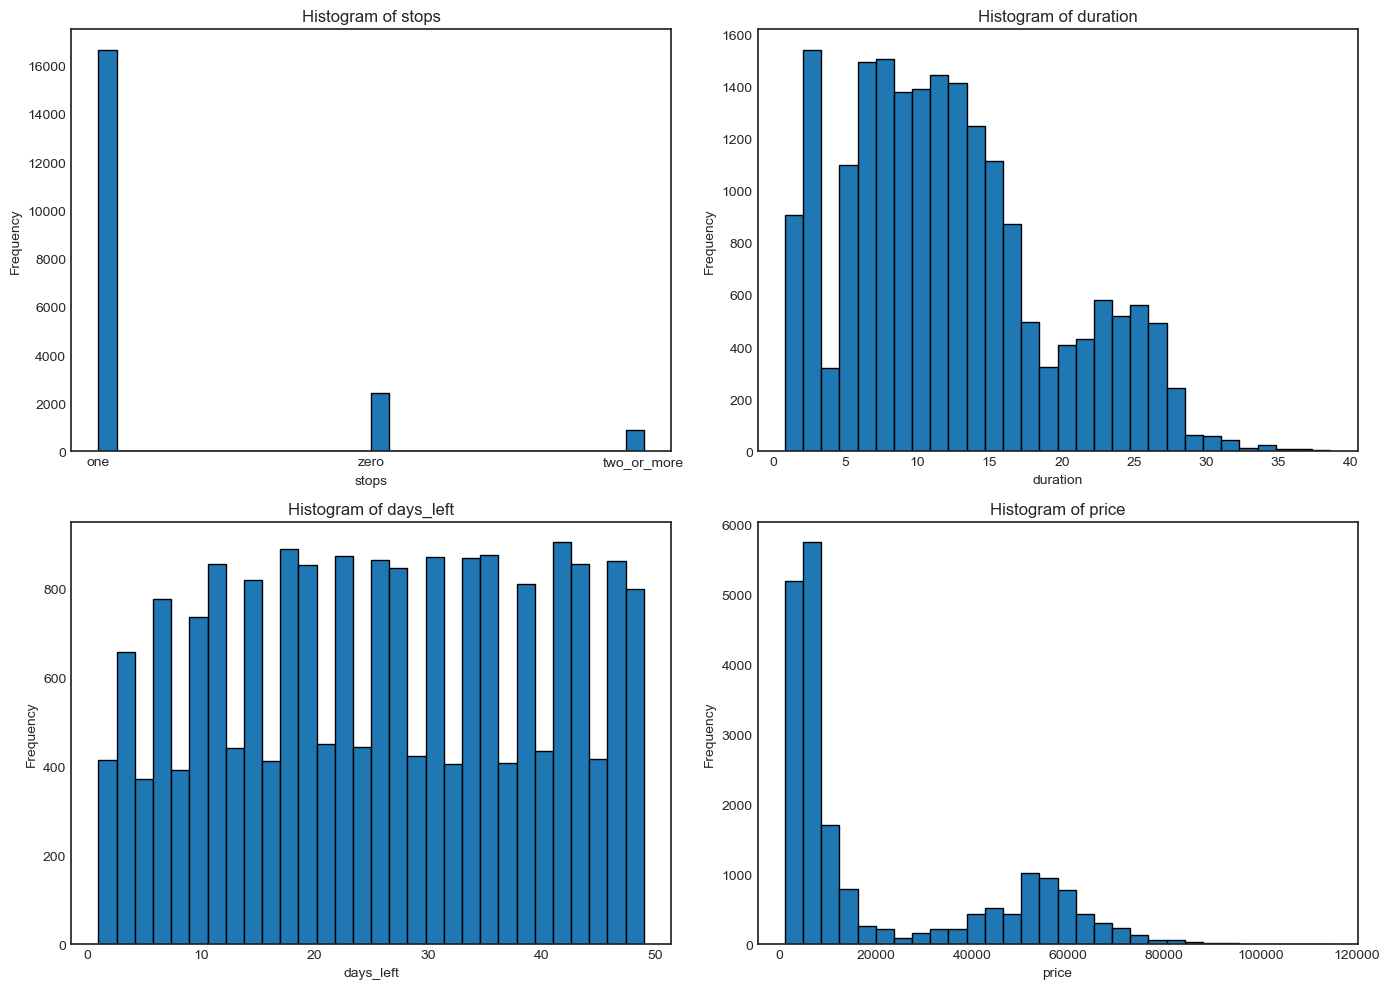

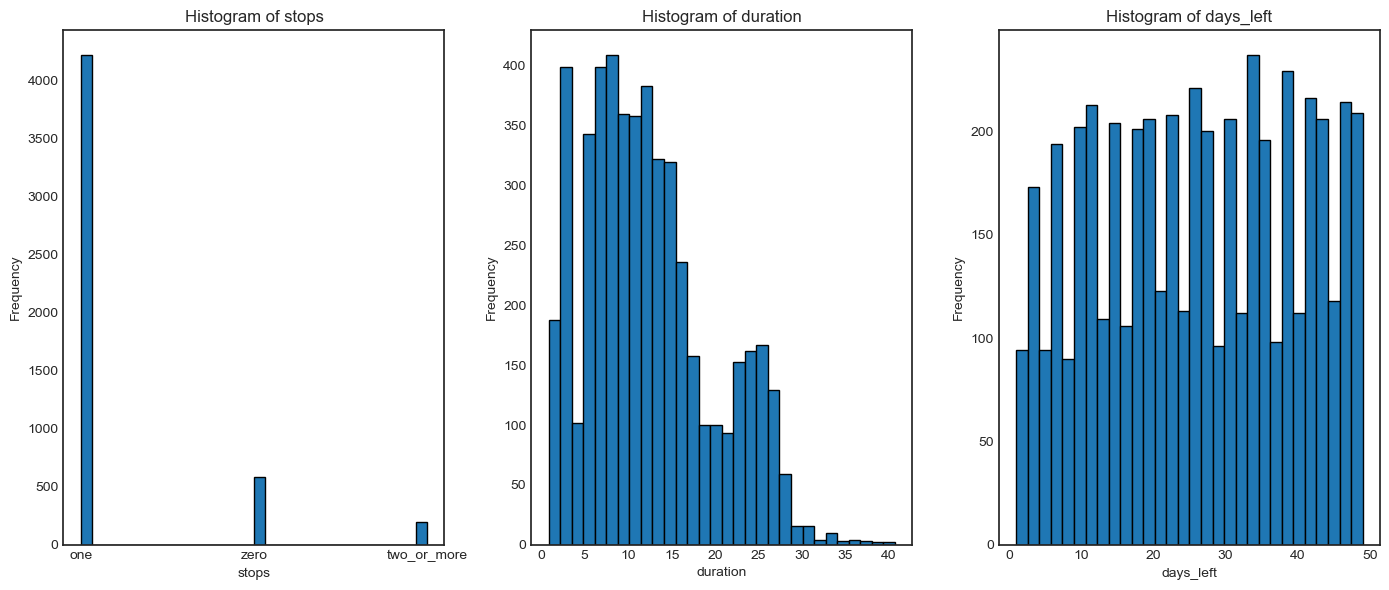

In [216]:
#Define numeric columns for histograms

numeric_columns_train = ['stops', 'duration', 'days_left', 'price']
numeric_columns_test = ['stops', 'duration', 'days_left']

# Create histograms for train_set
plt.style.use('seaborn-white')
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns_train, 1):
    plt.subplot(2, 2, i)
    plt.hist(train_set[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create histograms for test_set
plt.figure(figsize=(14, 6))
for i, column in enumerate(numeric_columns_test, 1):
    plt.subplot(1, 3, i)
    plt.hist(test_set[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

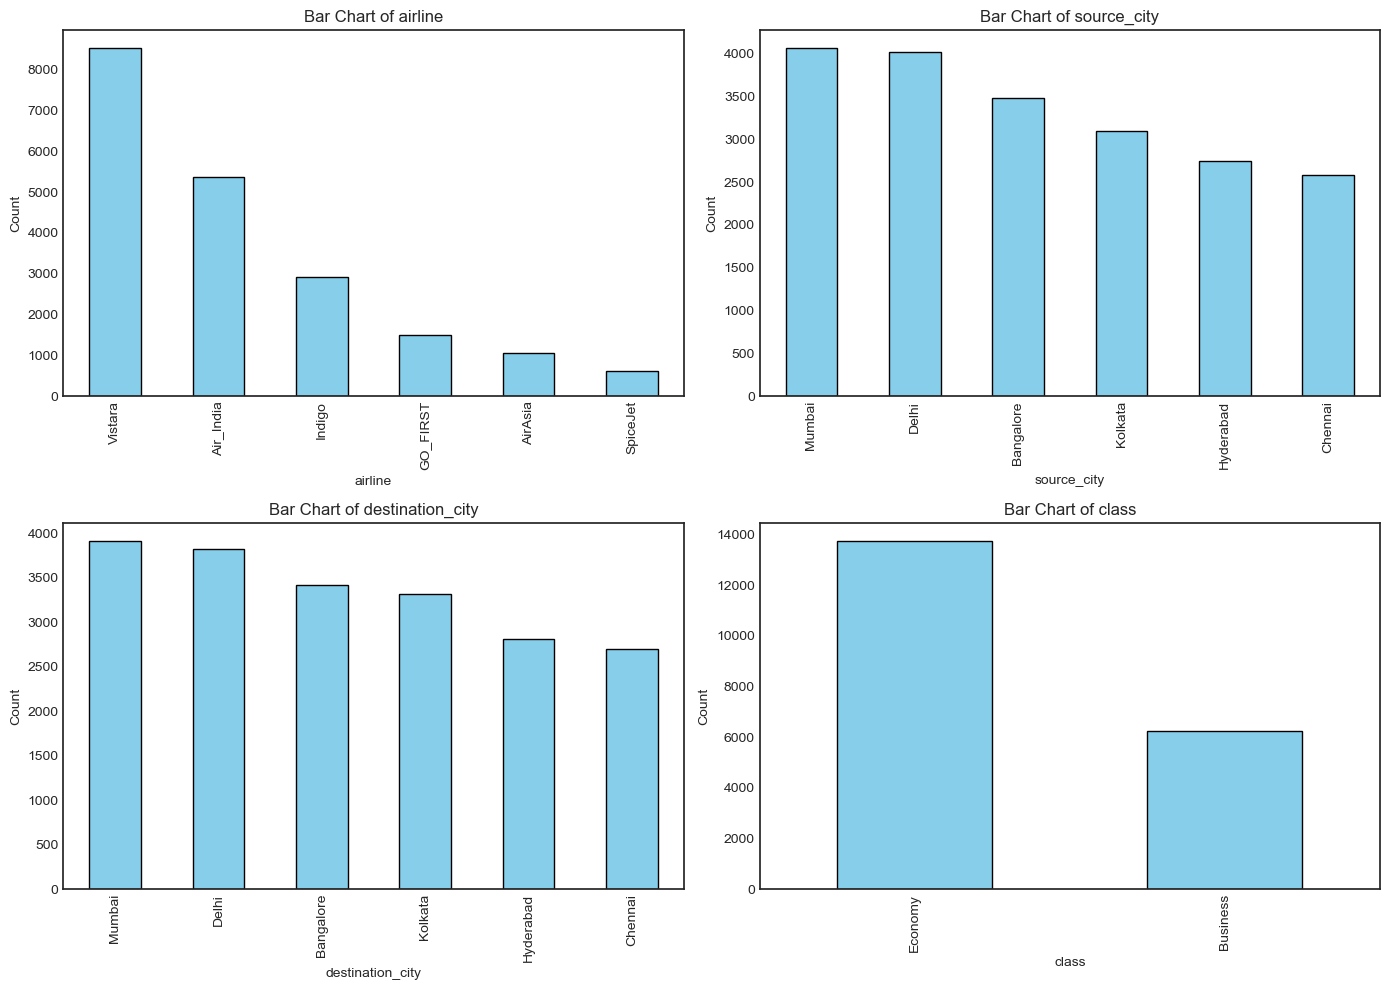

In [217]:
# Define categorical columns for bar charts
categorical_columns_train = ['airline', 'source_city', 'destination_city', 'class']

# Create bar charts for train_set
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns_train, 1):
    plt.subplot(2, 2, i)
    train_set[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


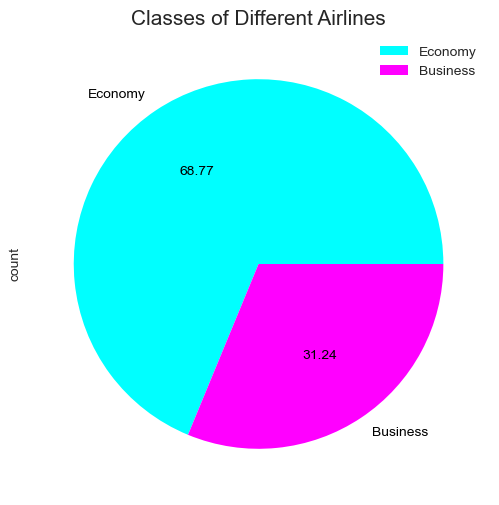

In [218]:
plt.figure(figsize=(8,6))
train_set['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.savefig('classes.png', format='png', dpi=300)
plt.show()

Does price vary with Airlines?

As we can see Vistara has Maximum Price range
Vistara and Air_India Airlines Have Maximum Price when compared to Others
SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/3889798972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_set['airline'],y=train_set['price'],palette='hls')


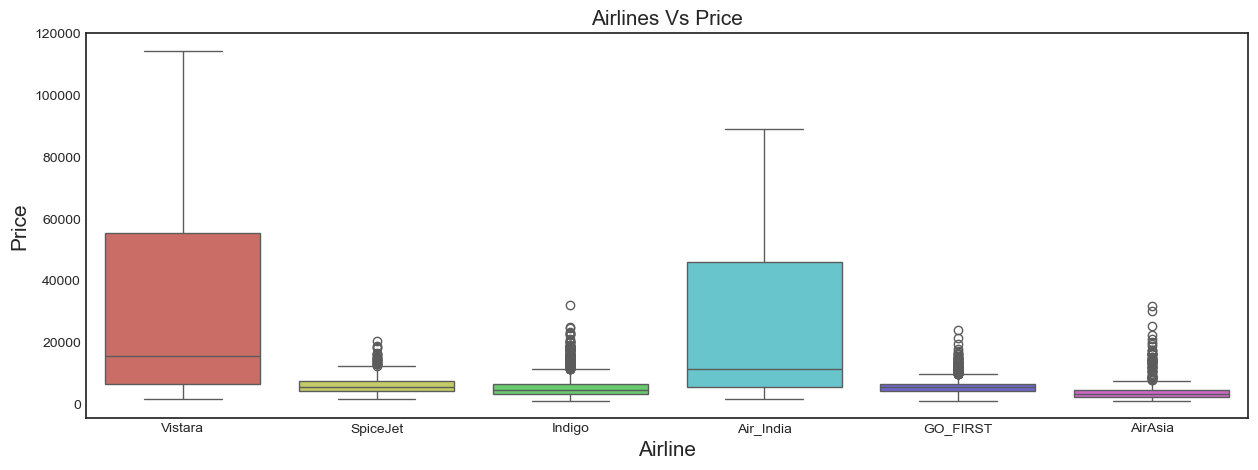

In [219]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train_set['airline'],y=train_set['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How Does the Ticket Price vary between Economy and Business Class?

Ticket Price is Maximum for Bussiness Class When compared to Economy Class

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/372791474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=train_set,palette='hls',legend=False)


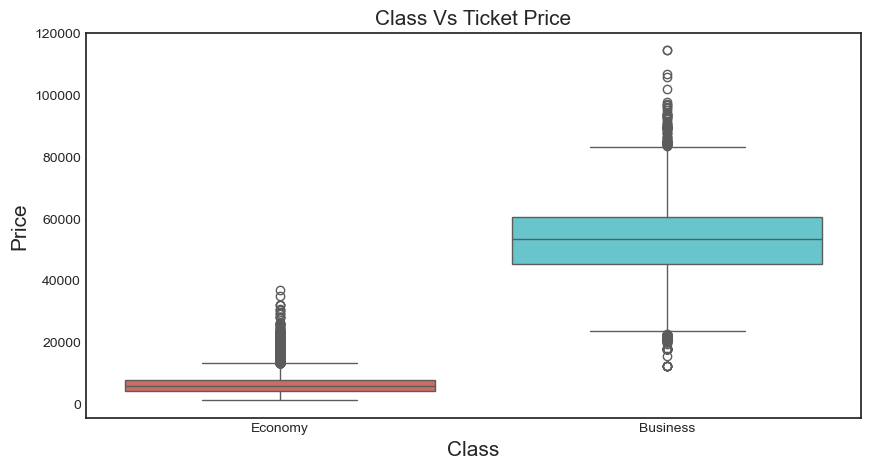

In [220]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=train_set,palette='hls',legend=False)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [221]:
train_set['stops']

id
1                one
2               zero
3                one
4                one
5               zero
            ...     
19996            one
19997            one
19998    two_or_more
19999            one
20000            one
Name: stops, Length: 20000, dtype: object

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/2352140875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price',data=train_set,palette='hls')


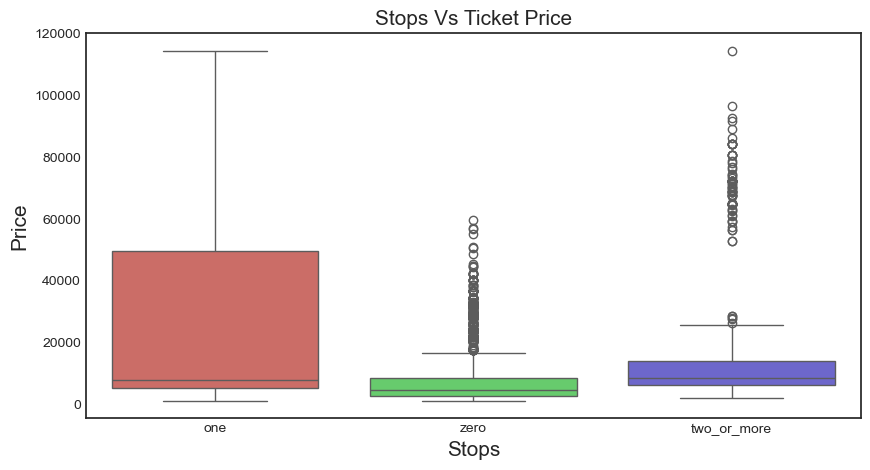

In [222]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=train_set,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.savefig('stops_vs_price.png', format='png', dpi=300)
plt.show()

How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time Vs Ticket Price

    -Ticket Price is More for the Flights when the Departure Time is at Night
    -Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
    -Ticket Price is Low for the Flights Having Departure Time at Late_night
2. Arrival Time Vs Ticket Price
    -Ticket Price is More for the Flights when the Arrival Time is at Evening
    -Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
    -Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/4074046022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time',y='price',data=train_set,palette='hls')


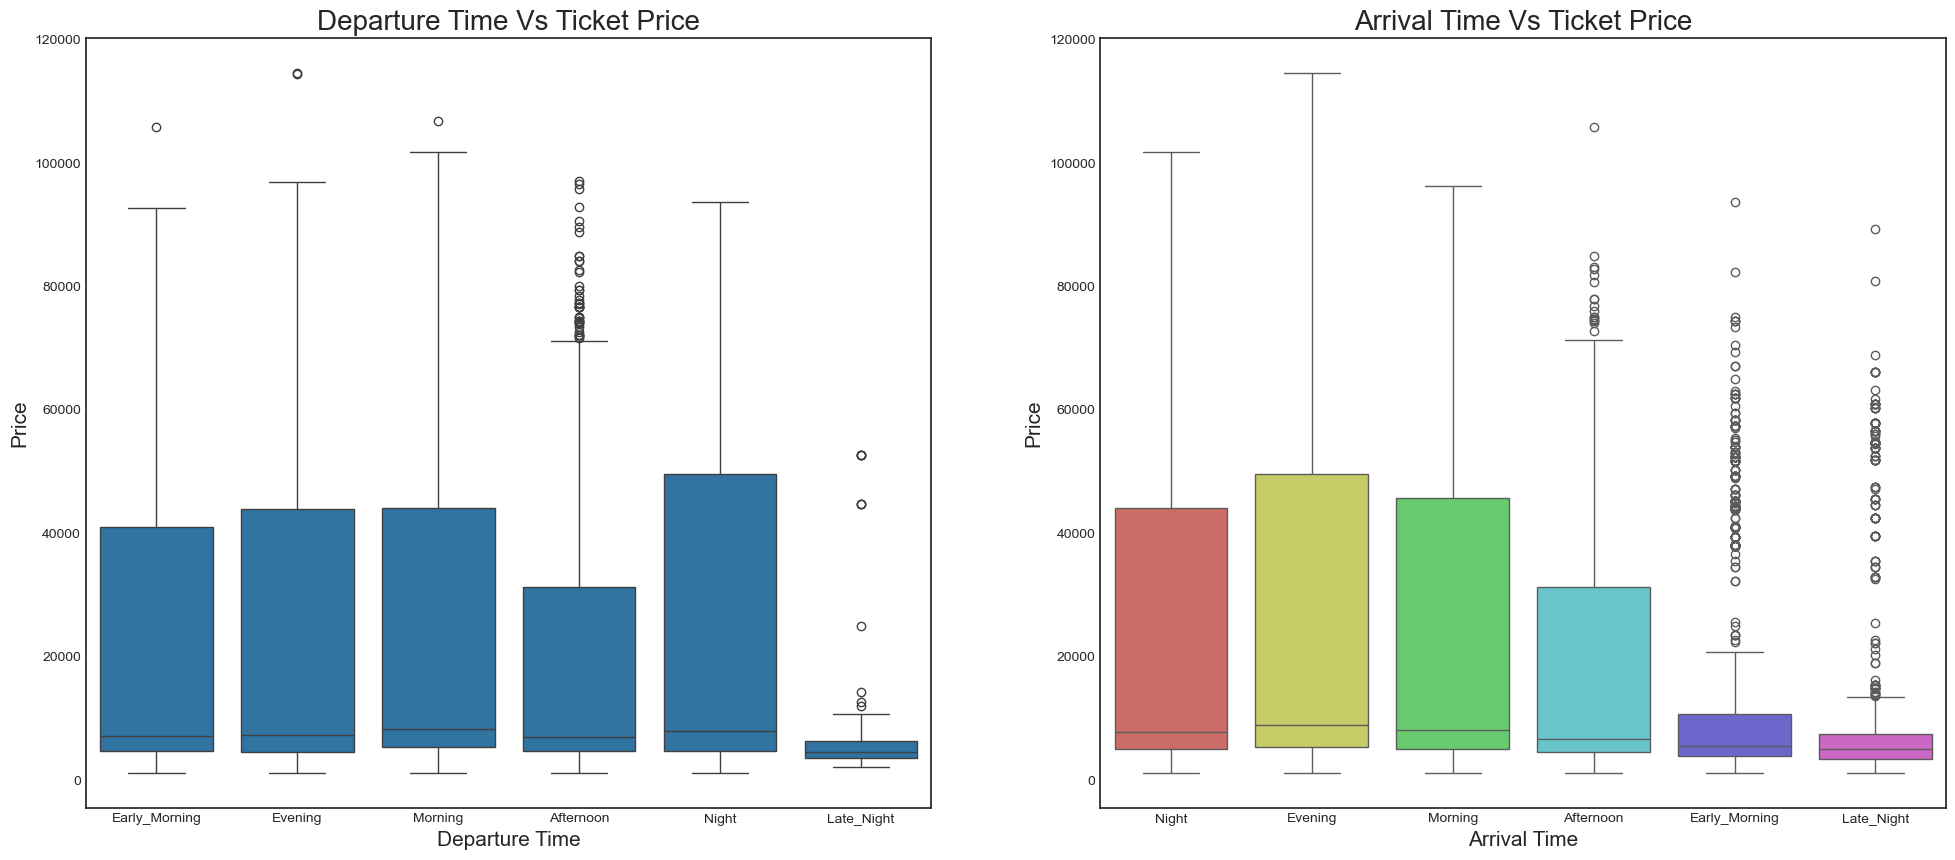

In [223]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=train_set)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=train_set,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the price changes with change in Source city and Destination city?
# 1. Source City Vs Ticket Price

    -Ticket Price is More for the Flights whose Source City is Kolkata
    -Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore
    -Ticket Price is Low for the Flights Having Source City as Delhi


# 2. Destination City Vs Ticket Price
    -Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
    -Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore
    -Ticket Price is Low for the Flights Having Destination City as Delhi

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/242535300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city',y='price',data=train_set,palette='hls')


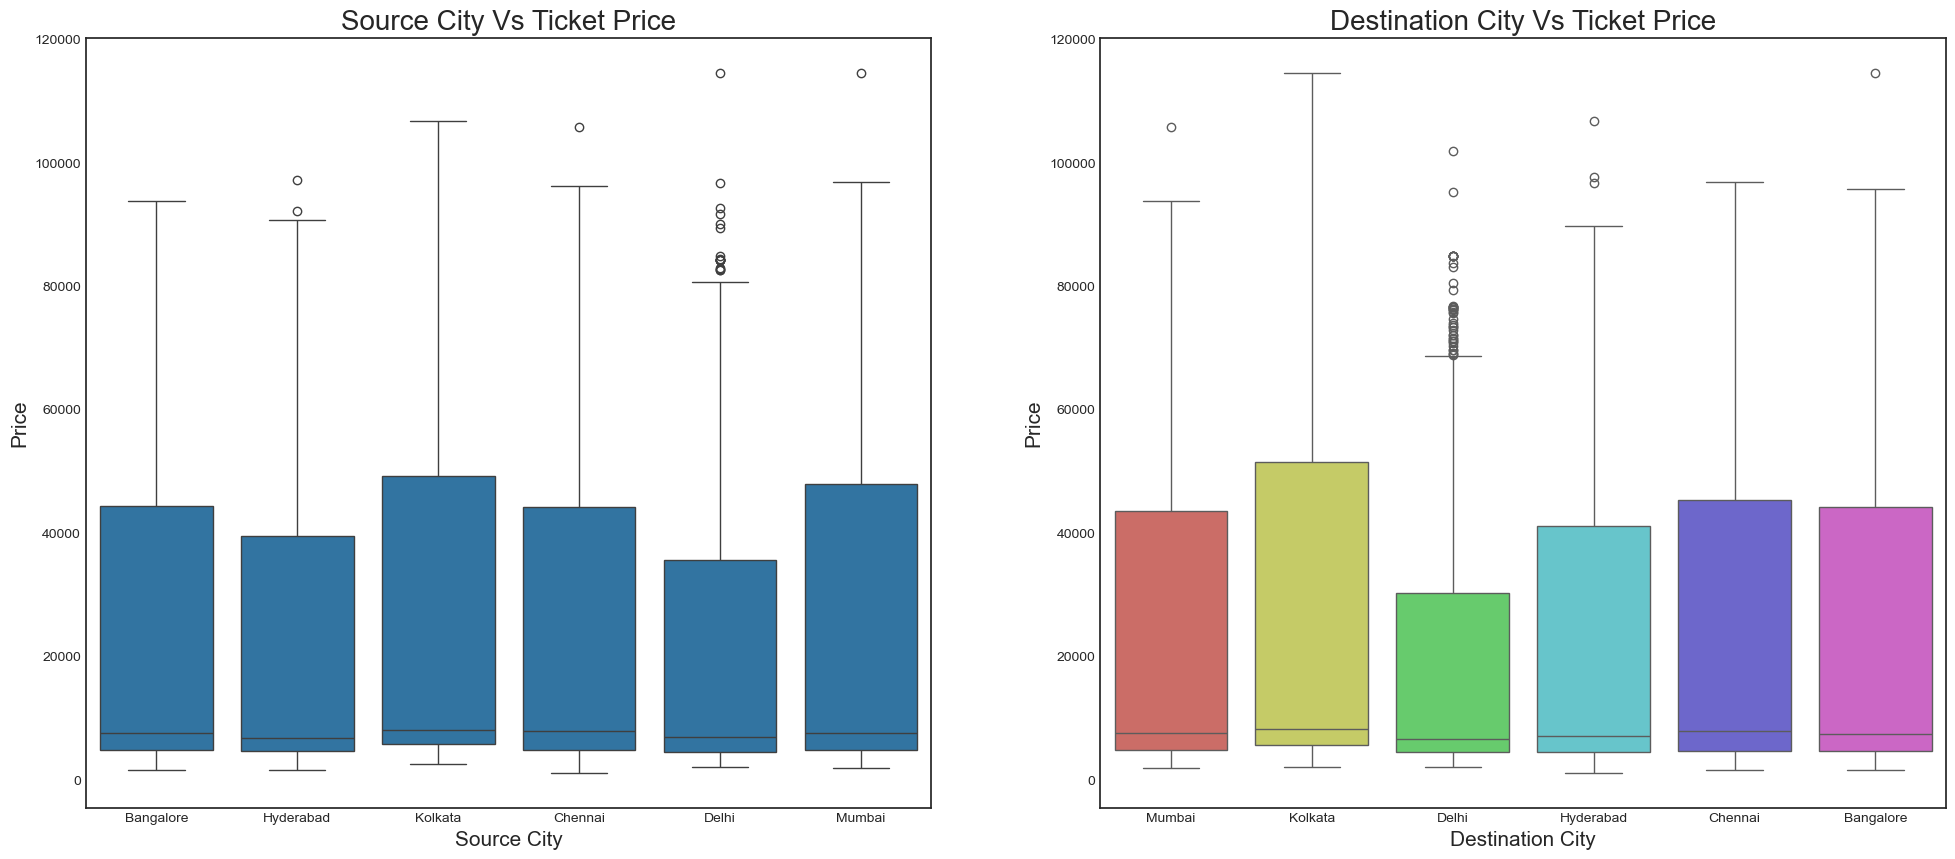

In [224]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=train_set)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=train_set,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.savefig('des_vs_ticket.png', format='png', dpi=300)
plt.show()

# How Price Varies with the Flight Duration Based on Class?

    -With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_88775/3850547052.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


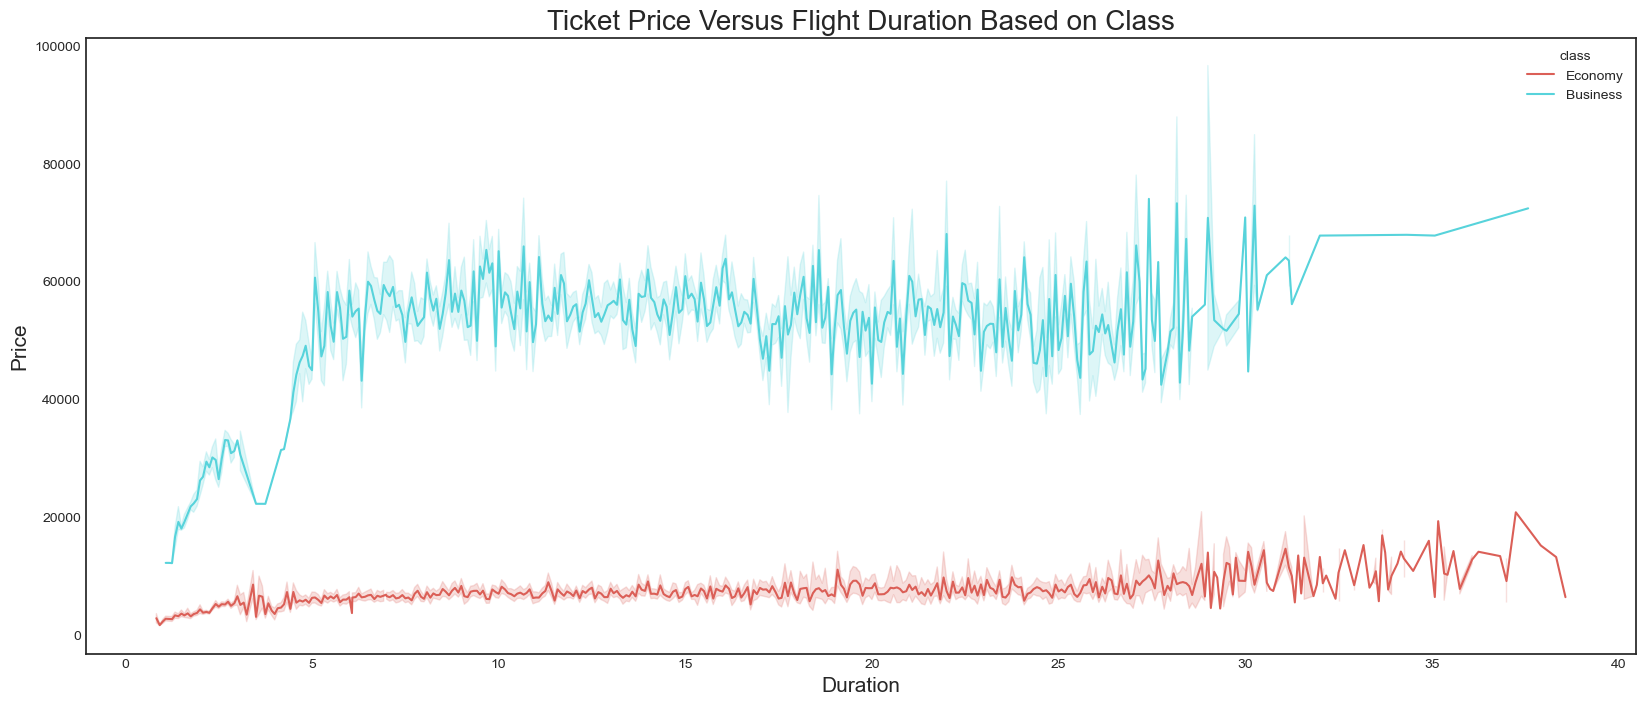

In [225]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,8))
sns.lineplot(data=train_set,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# How does the price affected on the days left for Departure?

# As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines

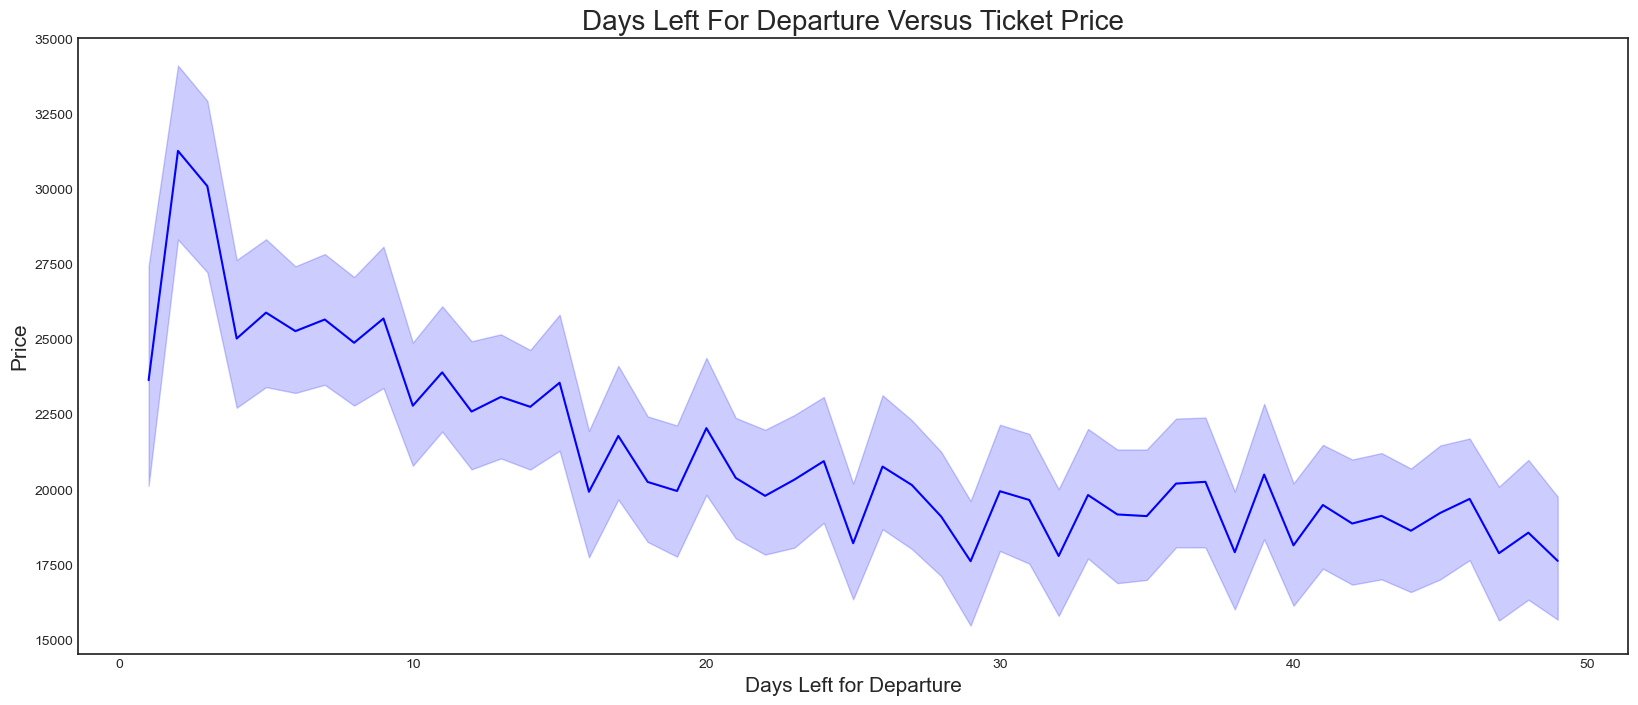

In [226]:
plt.figure(figsize=(20,8))
sns.lineplot(data=train_set,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

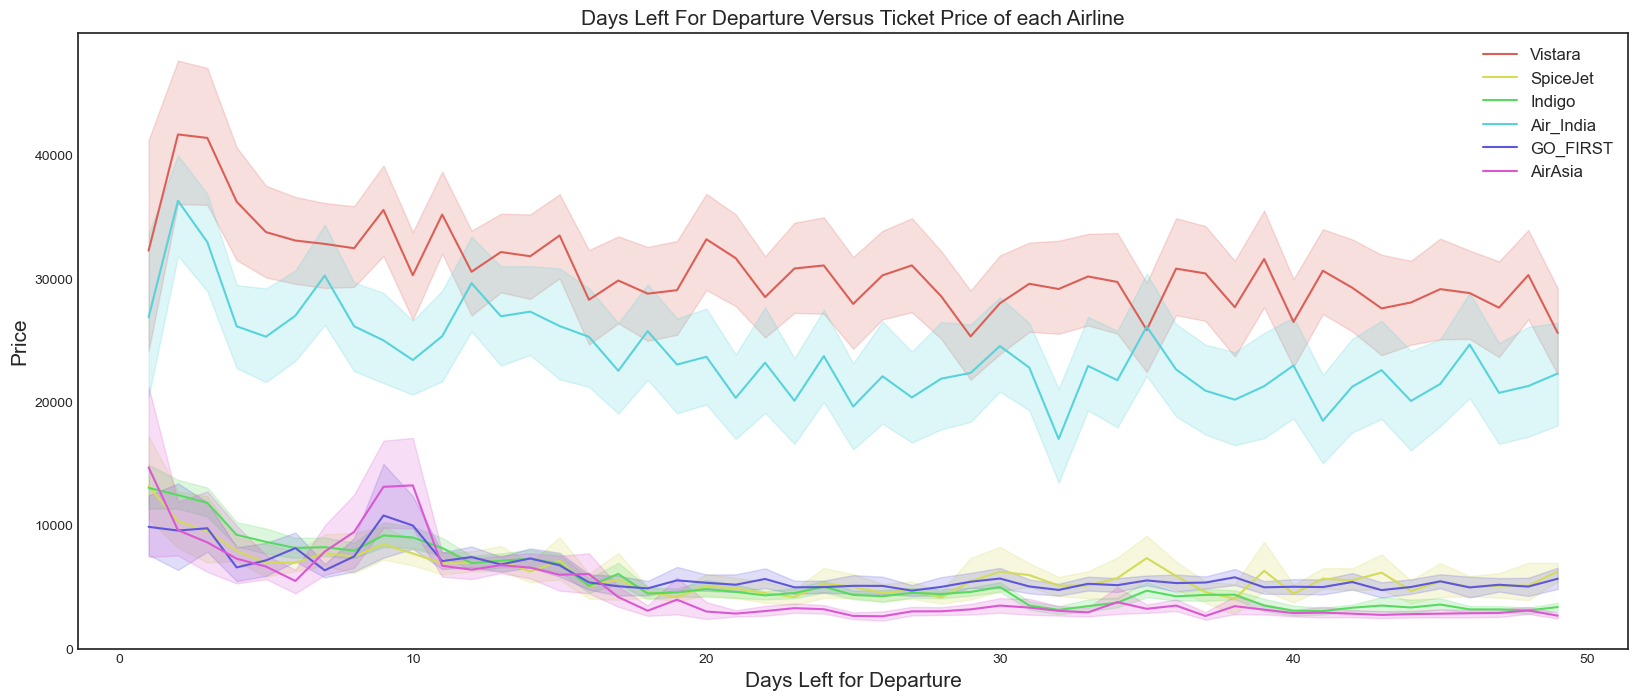

In [227]:
plt.figure(figsize=(20,8))
sns.lineplot(data=train_set,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Total number of Flights from one city to another

In [230]:
train_set.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,84
1,Bangalore,Delhi,180
2,Bangalore,Hyderabad,104
3,Bangalore,Kolkata,140
4,Bangalore,Mumbai,145
5,Chennai,Bangalore,52
6,Chennai,Delhi,90
7,Chennai,Hyderabad,69
8,Chennai,Kolkata,82
9,Chennai,Mumbai,70


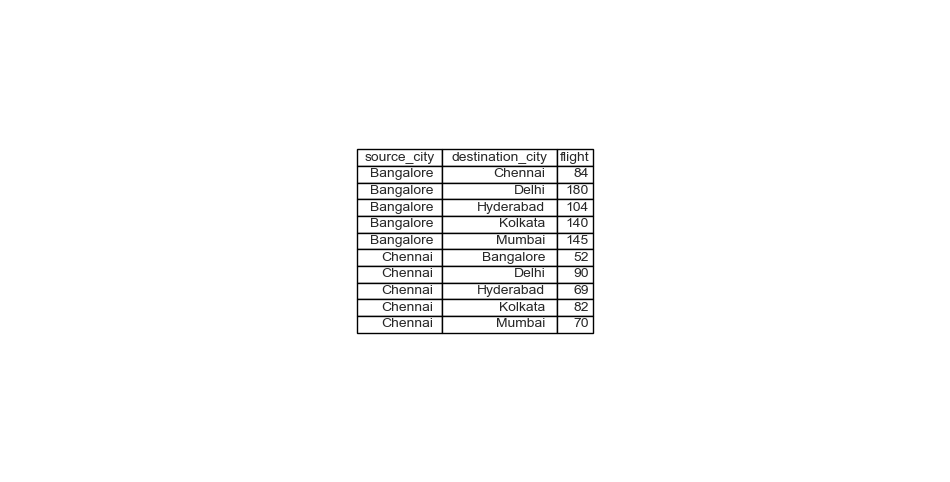

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Perform your groupby operation
grouped_df = train_set.groupby(['flight', 'source_city', 'destination_city', 'airline', 'class'], as_index=False).count()
grouped_df = grouped_df.groupby(['source_city', 'destination_city'], as_index=False)['flight'].count()
top_10 = grouped_df.head(10)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(cellText=top_10.values, colLabels=top_10.columns, loc='center')

# Adjust table properties for better appearance (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(top_10.columns))))

# Save the figure as an image file
plt.savefig('grouped_table.png', bbox_inches='tight', dpi=300)

# Display the table (optional)
plt.show()


# Average Price of different Airlnes from Source city to Destination city

In [232]:
train_set.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,1728.846154
1,AirAsia,Bangalore,Delhi,5495.443299
2,AirAsia,Bangalore,Hyderabad,3144.941176
3,AirAsia,Bangalore,Kolkata,4231.910714
4,AirAsia,Bangalore,Mumbai,2930.261905
5,AirAsia,Chennai,Bangalore,1471.636364
6,AirAsia,Chennai,Delhi,3868.608696
7,AirAsia,Chennai,Hyderabad,1826.000000
8,AirAsia,Chennai,Kolkata,3309.214286
9,AirAsia,Chennai,Mumbai,1830.000000


In [233]:
# Creating a Back up File
train_set_bk=train_set.copy()

# Correlation Matrix 

Correlation matrix shows the strength and direction of relationships between numeric variables. Correlation coefficients range from -1 to 1:

1: Perfect positive correlation
-1: Perfect negative correlation
0: No correlation


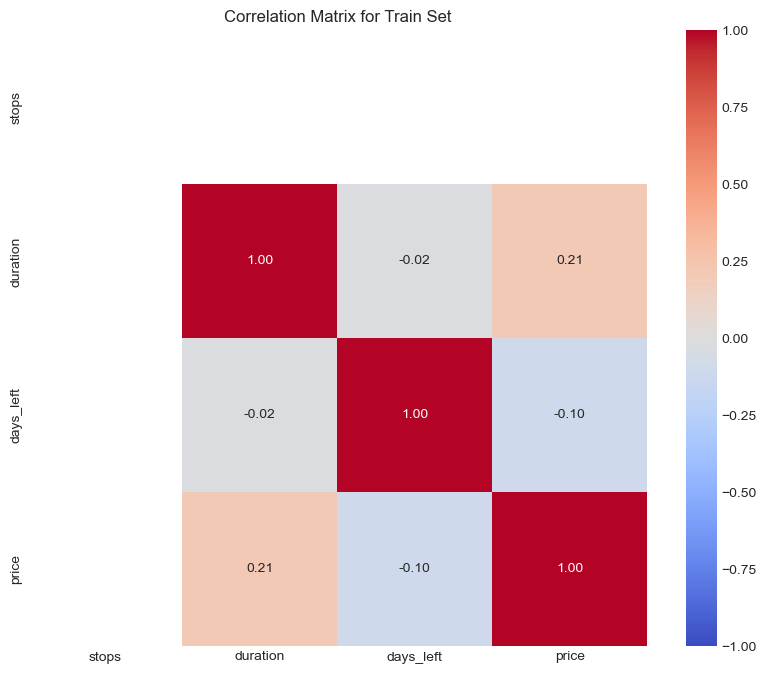

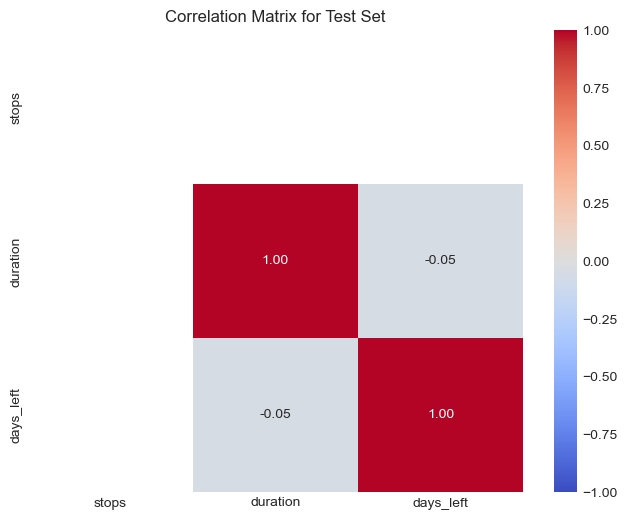

In [234]:
# Convert columns to numeric where possible, forcing errors to NaN
train_set_clean = train_set[numeric_columns_train].apply(pd.to_numeric, errors='coerce')
test_set_clean = test_set[numeric_columns_test].apply(pd.to_numeric, errors='coerce')

# Now create correlation matrices
correlation_matrix_train = train_set_clean.corr()
correlation_matrix_test = test_set_clean.corr()

# Plot correlation matrix for train_set
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Train Set')
plt.show()

# Plot correlation matrix for test_set
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Test Set')
plt.show()


In [235]:
# Define categorical columns for cross-tabulation
categorical_columns_train = ['airline', 'source_city', 'destination_city', 'class']
categorical_columns_test = ['airline', 'source_city', 'destination_city', 'class']

# Create cross-tabulations for train_set
for column1 in categorical_columns_train:
    for column2 in categorical_columns_train:
        if column1 != column2:
            cross_tab = pd.crosstab(train_set[column1], train_set[column2])
            print(f'Cross-Tabulation of {column1} and {column2} for Train Set:')
            print(cross_tab)
            print()

# Create cross-tabulations for test_set
for column1 in categorical_columns_test:
    for column2 in categorical_columns_test:
        if column1 != column2:
            cross_tab = pd.crosstab(test_set[column1], test_set[column2])
            print(f'Cross-Tabulation of {column1} and {column2} for Test Set:')
            print(cross_tab)
            print()


Cross-Tabulation of airline and source_city for Train Set:
source_city  Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
airline                                                           
AirAsia            225       94    292        116      187     142
Air_India          863      664   1116        719      809    1200
GO_FIRST           279       99    367        165      235     363
Indigo             451      437    553        450      537     496
SpiceJet            79       93    164         18      132     120
Vistara           1589     1197   1530       1280     1192    1747

Cross-Tabulation of airline and destination_city for Train Set:
destination_city  Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
airline                                                                
AirAsia                 231       94    285        106      174     166
Air_India               796      717    978        761      898    1221
GO_FIRST                287       99    367        1

# Data Quality Check 
4.1.1 Consistency Check

In [236]:
train_set['stops'].value_counts()

stops
one            16666
zero            2440
two_or_more      894
Name: count, dtype: int64

In [237]:

# Example: Check if 'price' values are non-negative
inconsistent_train = train_set[train_set['price'] < 0]

print("Inconsistent Train Set Entries:")
print(inconsistent_train)

# 4.1.3 Completeness Check
# Check for missing values
missing_train = train_set.isna().sum()
missing_test = test_set.isna().sum()

print("Missing Values in Train Set:")
print(missing_train)

print("Missing Values in Test Set:")
print(missing_test)

Inconsistent Train Set Entries:
Empty DataFrame
Columns: [airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []
Missing Values in Train Set:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Missing Values in Test Set:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64


# Summary
Data Integrity: Ensure that data values are consistent, accurate, and complete.
Outliers: Identify unusual values that differ significantly from the rest of the data using visualization or statistical methods.
Duplicates: Detect and remove duplicate records to maintain data quality.

In [238]:
# working with number columns

num_cols = ['duration', 'days_left']
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), num_cols)
])

# working with string columns

def data_converter(data, cat_cols, num_part=None):
    """
    work with string data and merge them to the new df
    """
    prepared = pd.DataFrame({}, index = data.index)
    flight = LabelEncoder().fit_transform(data['flight'])
    prepared["fligt"] = StandardScaler().fit_transform(flight.reshape(-1,1)) # Standardization
    for i in range(len(cat_cols)):
        col = pd.get_dummies(data[cat_cols[i]])
        col = col.astype(np.int8)
        prepared = pd.merge(prepared, col, left_index=True, right_index=True)
    if num_part is not None:
        return pd.merge(prepared, num_part, left_index=True, right_index=True)
    else: return prepared
        
# string columns
cat_cols = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

# number cols
num_part = train_set[["duration", "days_left", "price"]]

# standardization
num_part.loc[:, num_cols] = transformer.fit_transform(num_part)

prepared_trainset = data_converter(train_set, cat_cols, num_part)

prepared_trainset.head()


,fligt,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore_x,Chennai_x,Delhi_x,...,Chennai_y,Delhi_y,Hyderabad_y,Kolkata_y,Mumbai_y,Business,Economy,duration,days_left,price
id,,,,,,,,,,,,,,,,,,,,,
1,0.869720,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0.355497,0.416667,7212
2,0.627611,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0.024371,0.125000,5292
3,0.955008,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0.231788,0.083333,60553
4,0.806441,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0.156821,0.562500,5760
5,-1.713686,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0.030993,0.062500,10712


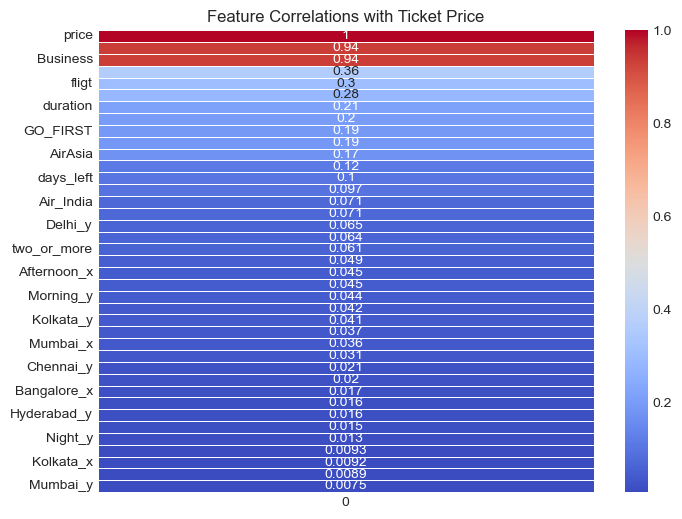

In [239]:
# correlation
correlations=prepared_trainset.corrwith(prepared_trainset['price']).abs().sort_values(ascending=False)
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='white')
plt.title("Feature Correlations with Ticket Price")
# Save the heatmap as an image file (e.g., PNG)
plt.savefig('heatmap_correlation.png', format='png', dpi=300)

# Show the heatmap

plt.show()

In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns


In [241]:
# Assuming prepared_trainset contains the final preprocessed data
X = prepared_trainset.drop('price', axis=1)  # Features
y = prepared_trainset['price']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [242]:
# Create a DataFrame to display the shapes
split_info = pd.DataFrame({
    'Dataset': ['X_train', 'X_test', 'y_train', 'y_test'],
    'Number of Samples': [X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]],
    'Number of Features': [X_train.shape[1], X_test.shape[1], 'N/A', 'N/A']
})

split_info

,Dataset,Number of Samples,Number of Features
0,X_train,16000,38
1,X_test,4000,38
2,y_train,16000,N/A
3,y_test,4000,N/A


# 4. Modelling


# 4.1 Linear Regression


In [243]:
# Initialize and train the model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [244]:
test_labels = y_test.loc[y_test.index]
print(test_labels)

id
10651     5361
2042     50297
8669     60232
1115     74365
13903     4417
         ...  
4074     10228
7443     12544
10000     5276
1871     79548
15197     2456
Name: price, Length: 4000, dtype: int64


# Evaluation of the LR model

In [245]:
from sklearn.metrics import f1_score, classification_report
y_pred_lr = LR_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
# count RMSE
lr_rmse = np.sqrt(lr_mse)
# print(f"RMSE: {lr_rmse}")

# count MAE
lr_mae = mean_absolute_error(y_test, y_pred_lr)
# print(f"MAE: {lr_mae}")
mse = mean_squared_error(y_test, y_pred_lr)

# print("Model Accuracy:", ((r2_score(y_test,y_pred_lr)*100).round(3)),'%')
# check the prediction
predicted_prices=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
metrics_lr = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Baseline_Value': [lr_mae, lr_rmse,((r2_score(y_test,y_pred_lr)*100).round(3))]
})


# Print title and DataFrame
print("\033[1m   Performance Metrics for Linear Regressor\033[0m")
metrics_lr


   Performance Metrics for Linear Regressor


,Metric,Baseline_Value
0,Mean Absolute Error (MAE),4532.598000
1,Root Mean Squared Error (RMSE),6723.251346
2,Accuracy,91.392000


# 4.2 Random Forest

In [246]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)



RandomForestRegressor()

In [247]:
# Make predictions
y_pred_rf = RF_model.predict(X_test)
# Evaluate the RF model
mse = mean_squared_error(y_test, y_pred_rf)

# count RMSE

rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_pred_rf)
# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(y_test,y_pred_rf)*100).round(3)),'%')
metrics_0 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Baseline_Value': [mae, rmse,((r2_score(y_test,y_pred_rf)*100).round(3))]
})


# Print title and DataFrame
print("\033[1m   Performance Metrics for Random Forest Regressor\033[0m")
metrics_0

   Performance Metrics for Random Forest Regressor


,Metric,Baseline_Value
0,Mean Absolute Error (MAE),1585.917375
1,Root Mean Squared Error (RMSE),3314.683406
2,Accuracy,97.908000


In [248]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  20.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  23.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  12.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  17.4s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  34.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total 

/Users/mak/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [255]:
best_params_random=random_search.best_params_

# Convert the parameters to a DataFrame
params_df2 = pd.DataFrame(list(best_params_random.items()), columns=['Parameter', 'Value'])

# Print the title and the DataFrame
print("\033[1m Best Parameters for Randomized SearchCV Random Forest  \033[0m")
params_df2

 Best Parameters for Randomized SearchCV Random Forest  


,Parameter,Value
0,n_estimators,300
1,min_samples_split,2
2,min_samples_leaf,1
3,max_depth,30
4,bootstrap,True


In [256]:
# # Best parameters
# print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")
# print(f"Model Accuracy (R²): {(r2*100).round(3)} %")
metrics_01 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'randomized_Value': [mae, rmse,((r2*100).round(3))]
})


# Print title and DataFrame
print("\033[1m   Performance Metrics for Randomized Search Random Forest Regressor\033[0m")
metrics_01

   Performance Metrics for Randomized Search Random Forest Regressor


,Metric,randomized_Value
0,Mean Absolute Error (MAE),1587.955805
1,Root Mean Squared Error (RMSE),3315.665858
2,Accuracy,97.906000


In [251]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [258]:
best_params_rfr=grid_search.best_params_

# Convert the parameters to a DataFrame
params_df1 = pd.DataFrame(list(best_params_rfr.items()), columns=['Parameter', 'Value'])

# Print the title and the DataFrame
print("\033[1m Best Parameters for Grid Searched Random Forest  \033[0m")
params_df1

 Best Parameters for Grid Searched Random Forest  


,Parameter,Value
0,bootstrap,True
1,max_depth,30
2,min_samples_leaf,1
3,min_samples_split,5
4,n_estimators,200


In [259]:
# # Best parameters
# print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_rf_gr = grid_search.best_estimator_
y_pred_rf = best_rf_gr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")
# print(f"Model Accuracy (R²): {(r2*100).round(3)} %")
metrics_012 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'GSearched_Value': [mae, rmse,((r2*100).round(3))]
})


# Print title and DataFrame
print("\033[1m   Performance Metrics for Grid Searched Random Forest Regressor\033[0m")
metrics_012

   Performance Metrics for Grid Searched Random Forest Regressor


,Metric,GSearched_Value
0,Mean Absolute Error (MAE),1612.940600
1,Root Mean Squared Error (RMSE),3317.401522
2,Accuracy,97.904000


In [260]:

                              # Concatenate side by side based on the 'Metric' column
random_final_table = pd.concat([metrics_0.set_index('Metric'), metrics_01.set_index('Metric'),metrics_012.set_index('Metric')], axis=1).reset_index()
from IPython.display import display, Markdown

# Display the title in bold using Markdown
display(Markdown("**Performance Metrics Comparison on RandomForestRegressor**"))

# Display the DataFrame
display(random_final_table)

**Performance Metrics Comparison on RandomForestRegressor**

,Metric,Baseline_Value,randomized_Value,GSearched_Value
0,Mean Absolute Error (MAE),1585.917375,1587.955805,1612.940600
1,Root Mean Squared Error (RMSE),3314.683406,3315.665858,3317.401522
2,Accuracy,97.908000,97.906000,97.904000


# 4.3 XGBRegressor

In [261]:
# Initialize and train the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [262]:


# Modelni baholaymiz
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
# count RMSE
rmse = np.sqrt(mse)

# count MAE
mae = mean_absolute_error(y_test, y_pred_xgb)

# Create a DataFrame to display the metrics
metrics_1 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Baseline_Value': [mae, rmse,((r2_score(y_test,y_pred_xgb)*100).round(3))]
})


# Print title and DataFrame
print("\033[1m         Performance Metrics for XGBRegressor\033[0m")
metrics_1

         Performance Metrics for XGBRegressor


,Metric,Baseline_Value
0,Mean Absolute Error (MAE),1884.703336
1,Root Mean Squared Error (RMSE),3368.604738
2,Accuracy,97.839000


In [263]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBRegressor
model = XGBRegressor(random_state=42)

# Set up GridSearchCV
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1,refit=True)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [264]:
# Best parameters and model
best_params = grid_search.best_params_
best_model_XGB = grid_search.best_estimator_

print("Best Parameters:", best_params)
# Convert the parameters to a DataFrame
params_df = pd.DataFrame(list(best_params.items()), columns=['Parameter', 'Value'])

# Print the title and the DataFrame
print("\033[1m   Best Parameters \033[0m")
params_df


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
   Best Parameters 


,Parameter,Value
0,colsample_bytree,1.0
1,learning_rate,0.2
2,max_depth,5.0
3,min_child_weight,1.0
4,n_estimators,300.0
5,subsample,0.9


In [265]:
best_model_XGB = grid_search.best_estimator_
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [266]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10015.621094823791 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
10015.374487175939 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
10016.625610262849 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
6313.187633465029 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
6317.0315572892505 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
6317.424856959479 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
5408.967332151343 {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300,

In [267]:
# Evaluate the best model
y_pred_best = best_model_XGB.predict(X_test)
mse_best = mean_squared_error(y_test ,y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
acc_xgb_best = (r2_score(y_test, y_pred_best) * 100)


# Create a DataFrame to display the metrics
metric2 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)','Accuracy'],
    'Gearched Value': [mae, rmse,acc_xgb_best]
})

# Print title and DataFrame
print("\033[1m         Performance Metrics for Grid Searched XGBRegressor\033[0m")
metric2

         Performance Metrics for Grid Searched XGBRegressor


,Metric,Gearched Value
0,Mean Absolute Error (MAE),1884.703336
1,Root Mean Squared Error (RMSE),3368.604738
2,Accuracy,97.717435


In [268]:
# Concatenate side by side based on the 'Metric' column
final_table = pd.concat([metrics_1.set_index('Metric'), metric2.set_index('Metric')], axis=1).reset_index()
from IPython.display import display, Markdown

# Display the title in bold using Markdown
display(Markdown("**Performance Metrics Comparison**"))

# Display the DataFrame
display(final_table)

**Performance Metrics Comparison**

,Metric,Baseline_Value,Gearched Value
0,Mean Absolute Error (MAE),1884.703336,1884.703336
1,Root Mean Squared Error (RMSE),3368.604738,3368.604738
2,Accuracy,97.839000,97.717435


# Randomized Search

In [271]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=best_model, 
                    param_distributions=param_grid, n_iter=10, 
    scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10, )
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error')

In [274]:
print('Best parameters: %s' % random_search.best_params_)


Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [275]:
random_model = random_search.best_estimator_

In [276]:
# Evaluate the best model
y_pred_best = random_search.predict(X_test)
mse_best = mean_squared_error(y_test ,y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
acc_xgb_best = (r2_score(y_test, y_pred_best) * 100)

print(f"RMSE: {rmse_best}")
print(f"MAE: {mae_best}")
print(f"Model Accuracy: {acc_xgb_best.round(3)}%")


RMSE: 3950.9036762822766
MAE: 2241.3661732788087
Model Accuracy: 97.027%


# 4.4 GradientBoostingRegressor

In [277]:
from sklearn.ensemble import GradientBoostingRegressor


In [278]:

modelGBR  = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
modelGBR.fit(X_train, y_train)

#

GradientBoostingRegressor(loss='absolute_error')

In [279]:
 # Modelni baholaymiz
y_pred_gbr =modelGBR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(test_labels, y_pred_gbr)
# count RMSE
rmse = np.sqrt(mse)

# count MAE
#Accuracy
acc_gbr=r2_score(test_labels,y_pred_gbr)*100
mae = mean_absolute_error(test_labels, y_pred_gbr)

metrics_3 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,rmse,acc_gbr]
})
print("\033[1m   Performance Metrics for GradientBoostingRegressor\033[0m\n")
metrics_3

   Performance Metrics for GradientBoostingRegressor



,Metric,Value
0,Mean Absolute Error (MAE),2926.090095
1,Root Mean Squared Error (RMSE),5299.021387
2,Accuracy,94.652680


# 4.5 SVM Model

In [280]:
# Initialize and train the SVM model
model_svm= SVR(kernel='rbf', C=100, epsilon=0.1)  # Radial basis function (RBF) kernel
model_svm.fit(X_train, y_train)



SVR(C=100)

In [144]:
# Make predictions
#y_val_pred = model.predict(X_val_s)
y_pred_svm = model_svm.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)
mae = mean_absolute_error(y_test, y_pred_svm)
# print(f"MAE: {mae}")
#Accuracy
acc_svm=r2_score(y_test,y_pred_svm)*100
rmse=np.sqrt(mse)
# print(f"RMSE: {np.sqrt(mse)}")
# print("Model Accuracy:", ((acc_svm).round(3)),'%')
metrics_4 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,rmse,acc_svm]
})
print("\033[1m        Performance Metrics for SVM model\033[0m\n")
metrics_4

        Performance Metrics for SVM model



,Metric,Value
0,Mean Absolute Error (MAE),4343.880600
1,Root Mean Squared Error (RMSE),7355.561290
2,Accuracy,89.696698


# 4.6 Bagging Regressor

In [116]:
from sklearn.ensemble import BaggingRegressor

#Initialize and train Bagging Regressor
modelbag = BaggingRegressor()
modelbag.fit(X_train,y_train)



BaggingRegressor()

In [117]:
# Make predictions
#y_val_pred = model.predict(X_val_s)
y_pred_bag = modelbag.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_bag)
r2 = r2_score(y_test, y_pred_bag)
#Accuracy
acc_br=r2_score(y_test,y_pred_bag)*100
# print(f"RMSE: {np.sqrt(mse)}")
mae = mean_absolute_error(y_test, y_pred_bag)

# print(f"MAE: {mae}")
# print("Model Accuracy:", ((acc_br).round(3)),'%')
metrics_5 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,np.sqrt(mse),acc_br]
})
print("\033[1m        Performance Metrics for Begging Regressor \033[0m\n")
metrics_5

        Performance Metrics for Begging Regressor 



,Metric,Value
0,Mean Absolute Error (MAE),1672.474984
1,Root Mean Squared Error (RMSE),3420.946390
2,Accuracy,97.771373


# 4.7 KNN Model

In [148]:
from sklearn.neighbors import KNeighborsRegressor

modelKNN = KNeighborsRegressor(n_neighbors=5)
modelKNN.fit(X_train,y_train)



KNeighborsRegressor()

In [150]:
# Make predictions

y_pred_knn = modelKNN.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_knn)

# count RMSE
rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred_knn)
# print(f"MAE: {mae}")
#Accuracy
acc_knn=r2_score(y_test,y_pred_knn)*100


# print("Model Accuracy:", ((acc_knn).round(3)),'%')
metrics_6 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Baseline Value': [mae,rmse,acc_knn]
})
print("\033[1m        Performance Metrics for KNN model \033[0m\n")
metrics_6

        Performance Metrics for KNN model 



,Metric,Baseline Value
0,Mean Absolute Error (MAE),3363.849000
1,Root Mean Squared Error (RMSE),5579.088606
2,Accuracy,94.072503


In [151]:

grid = {
    'n_neighbors': range(1,11),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric
    'p': [1, 2]  # Power parameter for the Minkowski distance
}
print('Number of tested models: %i'
      %np.prod([len(grid[element]) for element in grid]))
score_metric = 'accuracy'



Number of tested models: 120


In [152]:
from sklearn.model_selection import cross_val_score

print( 'Baseline with default parameters: %.3f' % np.mean(
 cross_val_score(modelKNN, X_train, y_train, cv=10, n_jobs=1)))

Baseline with default parameters: 0.935


In [153]:
from sklearn.model_selection import GridSearchCV
search=GridSearchCV(estimator=modelKNN,
                    param_grid=grid,
                    n_jobs=1,
                    cv=10)
search.fit(X,y)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [155]:
print('Best parameters: %s' % search.best_params_)
print(' CV Accuracy of best parameters: %.3f' %
      search.best_score_)
best_params_knn=search.best_params_
params_df1 = pd.DataFrame(list(best_params_knn.items()), columns=['Parameter', 'GSearched Value'])

# Print the title and the DataFrame
print("\033[1m      Best Parameters \033[0m")
params_df1

Best parameters: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
 CV Accuracy of best parameters: 0.958
      Best Parameters 


,Parameter,GSearched Value
0,metric,minkowski
1,n_neighbors,10
2,p,1
3,weights,distance


In [156]:
search.cv_results_

{'mean_fit_time': array([0.00398519, 0.00284338, 0.00239463, 0.0025203 , 0.00264726,
        0.00275853, 0.00241089, 0.00227952, 0.00261719, 0.0025291 ,
        0.00279753, 0.00242674, 0.0026396 , 0.00260172, 0.00307627,
        0.002687  , 0.0025557 , 0.00291283, 0.0024739 , 0.00282753,
        0.00273757, 0.00268764, 0.00222373, 0.00269058, 0.00260055,
        0.00285399, 0.00248008, 0.0026634 , 0.00283747, 0.00285683,
        0.00254107, 0.00258749, 0.00282209, 0.00309548, 0.00263548,
        0.00267963, 0.00280464, 0.0028177 , 0.00309947, 0.00265579,
        0.00249238, 0.00254941, 0.00248303, 0.00305781, 0.00284259,
        0.00264802, 0.00298193, 0.00241251, 0.00276918, 0.00259211,
        0.0026381 , 0.00269303, 0.00268466, 0.00276852, 0.00279429,
        0.00265086, 0.00273058, 0.00282023, 0.00264573, 0.00285864,
        0.00330956, 0.00359232, 0.00287557, 0.00282547, 0.00266542,
        0.00256774, 0.00251887, 0.00287516, 0.00261707, 0.00261774,
        0.0028589 , 0.00264664,

In [165]:
search.best_score_

0.9579712235267432

In [160]:
search.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [168]:
# Make predictions
model_knn_gr=search.best_estimator_
y_pred_knn = model_knn_gr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_knn)

# count RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred_knn)
print(f"MAE: {mae}")
#Accuracy
acc_knn1=r2_score(y_test,y_pred_knn)*100


print("Model Accuracy:", ((acc_knn1).round(3)),'%')
metrics_7 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'GSearched Value': [mae,rmse,acc_knn1]
})
print("\033[1m        Performance Metrics for GSearched KNN model \033[0m\n")
metrics_7

RMSE: 13.858681845687922
MAE: 0.219125
Model Accuracy: 100.0 %
        Performance Metrics for GSearched KNN model 



,Metric,GSearched Value
0,Mean Absolute Error (MAE),0.219125
1,Root Mean Squared Error (RMSE),13.858682
2,Accuracy,99.999963


In [159]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=modelKNN,
                                    param_distributions=grid, n_iter=10,
                                    scoring=score_metric,
                                    n_jobs=1, refit=True, cv=10, )
random_search.fit(X_train,y_train)

/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': range(1, 11),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [162]:
print ('Best parameters: %s' % random_search.best_params_)
print( 'CV Accuracy of best parameters: %.3f'  % random_search.best_score_)

Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1, 'metric': 'euclidean'}
CV Accuracy of best parameters: 0.415


In [163]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the model
model = KNeighborsRegressor()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': range(1, 30),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric
    'p': [1, 2]  # Power parameter for the Minkowski distance
}

# Perform randomized search
random_search = RandomizedSearchCV(
    model, 
    param_distributions=param_dist, 
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # For regression, using MSE as scoring metric
    n_jobs=-1,  # Use all available processors
    random_state=42  # For reproducibility
)
# Fit the randomized search model
random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': range(1, 30),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error')

In [200]:
print( 'Best parameters: %s' % random_search.best_params_)


Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 20, 'metric': 'minkowski'}


In [176]:
# Get the best model and parameters
best_model_rs = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions

y_pred_random = best_model_rs.predict(X_test)


# Evaluate the RF model
mse = mean_squared_error(y_test, y_pred_random)
# count RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_pred_random)
print(f"MAE: {mae}")
print("Model Accuracy:", ((r2_score(y_test, y_pred_random)*100).round(3)),'%')
metrics_8 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'RSearched Value': [mae,rmse,((r2_score(y_test, y_pred_random)*100).round(3))]
})
print("\033[1m        Performance Metrics for Randomized Search KNN model \033[0m\n")
metrics_8

RMSE: 4550.002991163308
MAE: 2806.231775742041
Model Accuracy: 96.058 %
        Performance Metrics for Randomized Search KNN model 



,Metric,RSearched Value
0,Mean Absolute Error (MAE),2806.231776
1,Root Mean Squared Error (RMSE),4550.002991
2,Accuracy,96.058000


# 4.8 ExtraTreesRegressor

In [144]:
from sklearn.ensemble import ExtraTreesRegressor

modelETR = ExtraTreesRegressor()
modelETR.fit(X_train,y_train)



ExtraTreesRegressor()

In [177]:
# Make predictions

y_pred_etr = modelETR.predict(X_test)


# Evaluate the RF model
mse = mean_squared_error(test_labels, y_pred_etr)
# count RMSE
rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(test_labels, y_pred_etr)
# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(test_labels,y_pred_etr)*100).round(3)),'%')
metrics_9 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,rmse,((r2_score(y_test, y_pred_etr)*100).round(3))]
})
print("\033[1m        Performance Metrics for ExtraTreesRegressor \033[0m\n")
metrics_9

        Performance Metrics for ExtraTreesRegressor 



,Metric,Value
0,Mean Absolute Error (MAE),1568.974160
1,Root Mean Squared Error (RMSE),3475.112648
2,Accuracy,97.700000


In [178]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
modelETR = ExtraTreesRegressor()

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=modelETR, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter settings sampled
                                   cv=5,  # Cross-validation strategy
                                   scoring='neg_mean_squared_error',  # Evaluation metric
                                   n_jobs=-1,  # Use all processors
                                   random_state=42)  # Set seed for reproducibility

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best hyperparameters: {best_params}')



/Users/mak/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mak/anaconda3/lib/pyth

Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
RMSE: 3555.273225657896
MAE: 1916.7422626130954
Model Accuracy: 97.593 %


In [181]:
# Use the best model to make predictions
best_model_etr = random_search.best_estimator_
y_pred = best_model_etr.predict(X_test)
# Evaluate the RF model
mse = mean_squared_error(y_test, y_pred)
# count RMSE
rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_pred)
# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(y_test, y_pred)*100).round(3)),'%')

# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(test_labels,y_pred_etr)*100).round(3)),'%')
metrics_10 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Randomized Value': [mae,rmse,((r2_score(y_test, y_pred)*100).round(3))]
})
print("\033[1m        Performance Metrics for Randomzied Search ExtraTreesRegressor \033[0m\n")
metrics_10

        Performance Metrics for Randomzied Search ExtraTreesRegressor 



,Metric,Randomized Value
0,Mean Absolute Error (MAE),1916.742263
1,Root Mean Squared Error (RMSE),3555.273226
2,Accuracy,97.593000


In [ ]:
from sklearn.model_selection import GridSearchCV
search_etr=GridSearchCV(estimator=modelETR,
                    param_grid=param_dist,
                    n_jobs=1,
                    cv=10)
search_etr.fit(X,y)


In [ ]:
# Use the best model to make predictions
best_model_etr_gr = search_etr.best_estimator_
y_pred = best_model_etr_gr.predict(X_test)
# Evaluate the RF model
mse = mean_squared_error(y_test, y_pred)
# count RMSE
rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(y_test, y_pred)
# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(y_test, y_pred)*100).round(3)),'%')

# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(test_labels,y_pred_etr)*100).round(3)),'%')
metrics_10 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Randomized Value': [mae,rmse,((r2_score(y_test, y_pred)*100).round(3))]
})
print("\033[1m        Performance Metrics for Randomzied Search ExtraTreesRegressor \033[0m\n")
metrics_10

# 4.9 Ridge model

In [76]:
modelRE=Ridge(alpha=1, solver="cholesky")
modelRE.fit(X_train,y_train)

Ridge(alpha=1, solver='cholesky')

In [79]:
# Make predictions
y_pred_re = modelRE.predict(X_test)

# Evaluate model performance
# Make predictions
# Evaluate the RF model
mse = mean_squared_error(test_labels, y_pred_re)
# count RMSE
rmse = np.sqrt(mse)
# print(f"RMSE: {rmse}")
# count MAE
mae = mean_absolute_error(test_labels, y_pred_re)
# print(f"MAE: {mae}")
# print("Model Accuracy:", ((r2_score(test_labels,y_pred_re)*100).round(3)),'%')
metrics_11 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,rmse,((r2_score(y_test, y_pred_re)*100).round(3))]
})
print("\033[1m        Performance Metrics for Ridge Regressor \033[0m\n")
metrics_11

        Performance Metrics for Ridge Regressor 



,Metric,Value
0,Mean Absolute Error (MAE),4552.569241
1,Root Mean Squared Error (RMSE),6721.184730
2,Accuracy,91.397000


# 4.10 Linear Lasso Model


In [118]:
from sklearn import linear_model 
modelLO=linear_model.Lasso(alpha=0.1)
modelLO.fit(X_train,y_train)


Lasso(alpha=0.1)

In [119]:
# Make predictions
y_pred_lo = modelLO.predict(X_test)


mse_lo = mean_squared_error(test_labels, y_pred_lo)
# count RMSE
rmse_lo = np.sqrt(mse)
print(f"RMSE: {rmse_lo}")
# count MAE
mae_lo = mean_absolute_error(test_labels, y_pred_lo)
print(f"MAE: {mae_lo}")
print("Model Accuracy:", ((r2_score(test_labels,y_pred_lo)*100).round(3)),'%')
metrics_12 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae_lo,rmse_lo,((r2_score(y_test, y_pred_lo)*100).round(3))]
})
print("\033[1m        Performance Metrics for Lasso Regressor \033[0m\n")
metrics_12

RMSE: 3420.946389734172
MAE: 4552.704776476433
Model Accuracy: 91.397 %
        Performance Metrics for Lasso Regressor 



,Metric,Value
0,Mean Absolute Error (MAE),4552.704776
1,Root Mean Squared Error (RMSE),3420.946390
2,Accuracy,91.397000


# Deep Learning Algorithms



# 1. Simple Artificial Neural Network (ANN)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Increase neurons
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with different hyperparameters
model_ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# Implement early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
model_ann.fit(X_train, y_train, epochs=100, batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss = model_ann.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/100
500/500 [==============================] - 1s 700us/step - loss: 398106784.0000 - val_loss: 57522760.0000 - lr: 0.0010
Epoch 2/100
500/500 [==============================] - 0s 554us/step - loss: 35533884.0000 - val_loss: 32089716.0000 - lr: 0.0010
Epoch 3/100
500/500 [==============================] - 0s 558us/step - loss: 29959374.0000 - val_loss: 31004212.0000 - lr: 0.0010
Epoch 4/100
500/500 [==============================] - 0s 572us/step - loss: 28965014.0000 - val_loss: 30038424.0000 - lr: 0.0010
Epoch 5/100
500/500 [==============================] - 0s 554us/step - loss: 28604452.0000 - val_loss: 29479402.0000 - lr: 0.0010
Epoch 6/100
500/500 [==============================] - 0s 556us/step - loss: 28271918.0000 - val_loss: 30388048.0000 - lr: 0.0010
Epoch 7/100
500/500 [==============================] - 0s 555us/step - loss: 28106484.0000 - val_loss: 29470586.0000 - lr: 0.0010
Epoch 8/100
500/500 [==============================] - 0s 561us/step - loss: 27822852.000

In [89]:

# Make predictions on the test set
y_pred_ann = model_ann.predict(X_test)

# Convert predictions to a flat array (if needed)
y_pred_ann = y_pred_ann.flatten()

# Create a DataFrame to compare actual vs. predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price ANN': y_pred_ann})

# Print the first few rows to compare
print(comparison_df.head(10))


125/125 [==============================] - 0s 265us/step
       Actual Price  Predicted Price ANN
id                                      
10651          5361          6716.587402
2042          50297         57371.183594
8669          60232         64931.839844
1115          74365         64059.035156
13903          4417          5820.192383
11964          3090          4013.996826
11073         45883         44256.355469
3003           5939          5240.781250
19772          4704          5112.449707
8116          60396         57254.363281


In [90]:
# Define price bins (adjust based on your dataset)
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6]

# Discretize the actual and predicted prices into bins
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred_ann, bins=bins, labels=labels)

# Generate the classification report
report = classification_report(y_test_binned, y_pred_binned)
print(f"Classification Report:\n{report}")


Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.21      0.31        75
           2       0.52      0.51      0.51       215
           3       0.33      0.31      0.32       304
           4       0.44      0.38      0.40       500
           5       0.34      0.42      0.38       453
           6       0.89      0.91      0.90      2453

    accuracy                           0.70      4000
   macro avg       0.52      0.46      0.47      4000
weighted avg       0.70      0.70      0.70      4000



In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_ann)
mae = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)*100

# print(f"Mean Squared Error: {np.sqrt(mse)}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared: {r2_ann}%")
metrics_13 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,np.sqrt(mse),r2_ann]
})
print("\033[1m        Performance Metrics for Artificial Neural Network (ANN) \033[0m\n")
metrics_13

        Performance Metrics for Artificial Neural Network (ANN) 



,Metric,Value
0,Mean Absolute Error (MAE),2521.443238
1,Root Mean Squared Error (RMSE),4383.228727
2,Accuracy,96.341247


# 2. Convolutional Neural Network (CNN)

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Convert the DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Reshape the input data to fit Conv1D layer requirements (samples, steps, channels)
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

# Now X_train_reshaped and X_test_reshaped are ready for Conv1D

# Create a CNN model using Keras for regression
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='linear'))  # Output layer for regression

cnn_model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

# Train and evaluate the CNN model
cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

cnn_loss, cnn_mae = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"CNN Test MAE: {cnn_mae:.2f}")



Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 787182208.0000 - mae: 18399.9395 - val_loss: 541492416.0000 - val_mae: 19011.4160
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 509691936.0000 - mae: 19592.0996 - val_loss: 527537696.0000 - val_mae: 19573.1387
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 502828512.0000 - mae: 19567.2344 - val_loss: 519211200.0000 - val_mae: 19685.1133
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 495867360.0000 - mae: 19420.2031 - val_loss: 510737280.0000 - val_mae: 20126.5020
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 486779488.0000 - mae: 19282.6035 - val_loss: 500225216.0000 - val_mae: 19874.4199
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 474698784.0000 - mae: 19084.5039 - val_loss: 484229376.0000 - val_mae: 19359.5645
Epoch 7/50
200/200 [==============================] - 0s 1ms/ste

In [97]:
# Make predictions on the test set
y_pred_cnn = cnn_model.predict(X_test_reshaped)

# Convert predictions to a flat array (if needed)
y_pred_cnn = y_pred_cnn.flatten()


# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_cnn)
mae = mean_absolute_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)*100

# print(f"Mean Squared Error: {np.sqrt(mse)}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared: {r2_cnn}%")
metrics_14 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,np.sqrt(mse),r2_cnn]
})
print("\033[1m        Performance Metrics for Convolutional Neural Network (CNN) \033[0m\n")
metrics_14

125/125 [==============================] - 0s 509us/step
        Performance Metrics for Convolutional Neural Network (CNN) 



,Metric,Value
0,Mean Absolute Error (MAE),3856.713525
1,Root Mean Squared Error (RMSE),5889.654761
2,Accuracy,93.394214


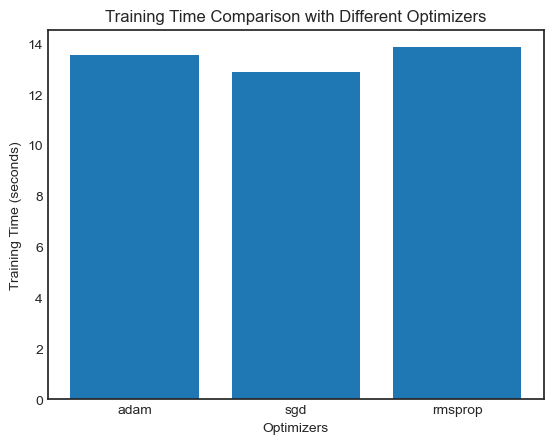

adam Optimizer - Test MAE: 4292.50
sgd Optimizer - Test MAE: nan
rmsprop Optimizer - Test MAE: 4232.38
Lowest MAE Achieved: 4232.38


In [98]:
# Experiment with different optimizers
import time

optimizers = ['adam', 'sgd', 'rmsprop']

training_times = []
mae_scores = []

for optimizer in optimizers:
    # Create a new CNN model
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    # Measure training time
    start_time = time.time()
    model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Evaluate the model
    _, mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
    mae_scores.append(mae)

# Plot training times
plt.bar(optimizers, training_times)
plt.xlabel('Optimizers')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison with Different Optimizers')
plt.show()

# Print MAE achieved with different optimizers
for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test MAE: {mae_scores[i]:.2f}")

# Find and print the lowest achieved MAE (best performance)
best_mae = min(mae_scores)
print(f"Lowest MAE Achieved: {best_mae:.2f}")


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Create a CNN model using Keras for regression
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='linear'))  # Output layer for regression

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train and evaluate the CNN model
cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

cnn_loss, cnn_mae = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"CNN Test MAE: {cnn_mae:.2f}")


Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 768779136.0000 - mae: 19192.9297 - val_loss: 530153632.0000 - val_mae: 20434.2207
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 507705344.0000 - mae: 19688.0742 - val_loss: 524079360.0000 - val_mae: 19891.2051
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 502048768.0000 - mae: 19539.4609 - val_loss: 517889024.0000 - val_mae: 19968.0586
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 495780000.0000 - mae: 19483.0469 - val_loss: 510929824.0000 - val_mae: 19830.4609
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 487852192.0000 - mae: 19355.4355 - val_loss: 502513120.0000 - val_mae: 19325.7695
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 476863616.0000 - mae: 19133.4355 - val_loss: 487919040.0000 - val_mae: 19199.2168
Epoch 7/50
200/200 [==============================] - 0s 2ms/ste

In [105]:
# Make predictions on the test set
y_pred_cnn = cnn_model.predict(X_test_reshaped)

# Convert predictions to a flat array (if needed)
y_pred_cnn = y_pred_cnn.flatten()


# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_cnn)
mae = mean_absolute_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)*100

# print(f"Mean Squared Error: {np.sqrt(mse)}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared: {r2_cnn}%")

# # Create a DataFrame to compare actual vs. predicted prices
# comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_cnn})

# # Print the first few rows to compare
# print(comparison_df.head(10))
metrics_14_1 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Optimized Value': [mae,np.sqrt(mse),r2_cnn]
})
print("\033[1m        Performance Metrics for Optimized Convolutional Neural Network (CNN) \033[0m\n")
metrics_14_1

125/125 [==============================] - 0s 442us/step
        Performance Metrics for Optimized Convolutional Neural Network (CNN) 



,Metric,Optimized Value
0,Mean Absolute Error (MAE),3783.336448
1,Root Mean Squared Error (RMSE),5863.343269
2,Accuracy,93.453104


In [108]:
final_table_cnn = pd.concat([metrics_14.set_index('Metric'), metrics_14_1.set_index('Metric')], axis=1).reset_index()
from IPython.display import display, Markdown

# Display the title in bold using Markdown
display(Markdown("**Performance Metrics Comparison**"))

# Display the DataFrame
display(final_table_cnn)

**Performance Metrics Comparison**

,Metric,Value,Optimized Value
0,Mean Absolute Error (MAE),3856.713525,3783.336448
1,Root Mean Squared Error (RMSE),5889.654761,5863.343269
2,Accuracy,93.394214,93.453104


#### 3. Multilayer Perceptron (MLP)

In [109]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report


In [145]:
# Define the MLP model
mlp_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [110]:
# Define the MLP model
mlp_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
400/400 [==============================] - 0s 527us/step - loss: 593492608.0000 - val_loss: 283068000.0000
Epoch 2/50
400/400 [==============================] - 0s 425us/step - loss: 134761824.0000 - val_loss: 47380024.0000
Epoch 3/50
400/400 [==============================] - 0s 424us/step - loss: 35560040.0000 - val_loss: 33769544.0000
Epoch 4/50
400/400 [==============================] - 0s 424us/step - loss: 30650704.0000 - val_loss: 32008172.0000
Epoch 5/50
400/400 [==============================] - 0s 424us/step - loss: 29490924.0000 - val_loss: 31067310.0000
Epoch 6/50
400/400 [==============================] - 0s 566us/step - loss: 28935726.0000 - val_loss: 30648576.0000
Epoch 7/50
400/400 [==============================] - 0s 432us/step - loss: 28473722.0000 - val_loss: 30245304.0000
Epoch 8/50
400/400 [==============================] - 0s 427us/step - loss: 28156744.0000 - val_loss: 30634990.0000
Epoch 9/50
400/400 [==============================] - 0s 426us/step -

In [114]:
# Evaluate the model
y_pred = mlp_model.predict(X_test)

# Reshape y_pred to be 1D if necessary
y_pred = y_pred.flatten()

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# Create a DataFrame to compare actual vs. predicted prices
# comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Print the first few rows to compare
# print(comparison_df.head(10))

# Since this is a regression problem, we cannot generate a classification report.
# Remove the following lines as they are intended for classification tasks.
# report = classification_report(y_test, y_pred)
# print(f"Classification Report:\n{report}")

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
r2_mlp = r2_score(y_test, y_pred) * 100

# print(f"Mean Squared Error (Root): {np.sqrt(mse)}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared: {r2_fnn}%")
metrics_15 = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'Accuracy'],
    'Value': [mae,np.sqrt(mse),r2_mlp]
})
print("\033[1m  Performance Metrics for Multilayer Perceptron (MLP) \033[0m\n")
metrics_15

125/125 [==============================] - 0s 300us/step
  Performance Metrics for Multilayer Perceptron (MLP) 



,Metric,Value
0,Mean Absolute Error (MAE),2777.096309
1,Root Mean Squared Error (RMSE),4839.069764
2,Accuracy,95.540681


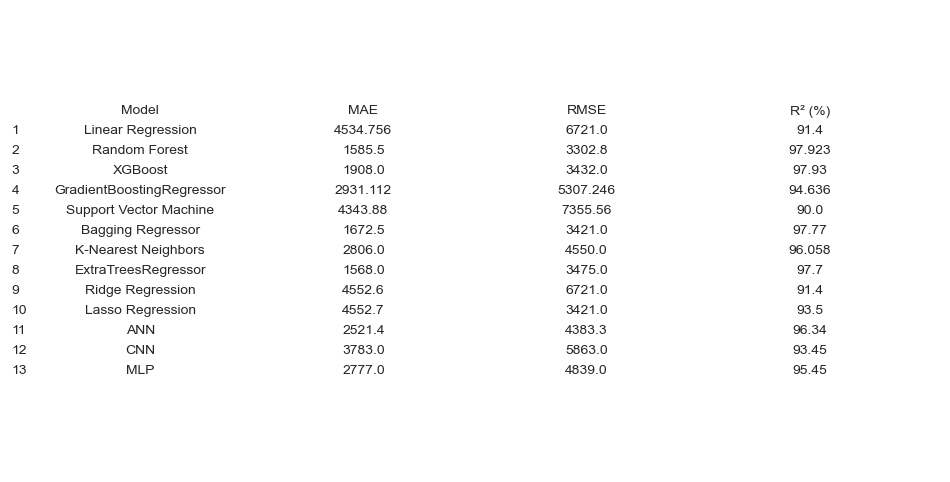

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Define the data
data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'GradientBoostingRegressor', 
              'Support Vector Machine', 'Bagging Regressor', 'K-Nearest Neighbors', 
              'ExtraTreesRegressor', 'Ridge Regression', 'Lasso Regression', 'ANN', 
              'CNN', 'MLP'],
    
    'MAE': [4534.756, 1585.5, 1908, 2931.112, 4343.88, 1672.5, 
            2806, 1568, 4552.6, 4552.7, 2521.4, 3783, 2777],
    
    'RMSE': [6721, 3302.8, 3432, 5307.246, 7355.56, 3421, 
             4550, 3475, 6721, 3421, 4383.3, 5863, 4839],
    
    'R² (%)': [91.4, 97.923, 97.93, 94.636, 90, 97.77, 
               96.058, 97.7, 91.4, 93.5, 96.34, 93.45, 95.45]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add a custom index starting from 1
df.index = df.index + 1
df.index.name = 'Index'  # Give the index a name (optional)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table with custom index
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns)) 

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Remove cell edges (no lines between rows/columns)
for key, cell in tbl.get_celld().items():
    cell.set_linewidth(0)  # Remove the cell border

# Save the table as an image
plt.savefig('model_performance_table_11_lines.png', dpi=300, bbox_inches='tight')

# Show the table (optional)
plt.show()
